In [235]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
from bs4 import BeautifulSoup
import altair as alt
from altair import datum

### Data Collection

Every Single Hallmark Movie is Listed on Wikipedia across several pages. 2000-2015 is in one URL and all the years after 2015 has a indiv address with the year changing in the url

In [3]:
# collecting the data for 2000-2015

response = requests.get('https://en.wikipedia.org/wiki/List_of_Hallmark_Channel_Original_Movies_(2000%E2%80%932015)#2000')
doc = BeautifulSoup(response.text)

In [4]:
df_list = []
for i in range(1,22):
    url = 'https://en.wikipedia.org/wiki/List_of_Hallmark_Channel_Original_Movies_(2000%E2%80%932015)#2000'
    df_list.append(pd.read_html(url)[i])

df_2015 = pd.concat(df_list)
df_2015


,No.,Movie,Starring,Director,Original airdate,Viewers,Ref,DVD
0,1.0,A Storm in Summer,"Peter Falk, Andrew McCarthy and Nastassja Kinski",Robert Wise,"February 27, 2000",NaN,NaN,NaN
1,2.0,Arabian Nights (2-part miniseries),Mili Avital and Jason Scott Lee,Steve Barron,"April 30, 2000",NaN,NaN,NaN
2,3.0,Personally Yours (a.k.a. Wilderness Love),Valerie Bertinelli and Jeffrey Nordling,Jeffrey Reiner,"October 8, 2000",NaN,NaN,NaN
3,4.0,The Hound of the Baskervilles†,Matt Frewer and Kenneth Welsh,Rodney Gibbons,"October 21, 2000",NaN,[3],NaN
4,5.0,The Christmas Secret (a.k.a. Flight of Reindeer),Beau Bridges and Richard Thomas,Ian Barry,"December 17, 2000",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
37,NaN,Karen Kingsbury's The Bridge: Part 1 (CtC),Katie Findlay and Wyatt Nash,Mike Rohl,"December 6, 2015",3.20,[317],NaN
38,NaN,On the Twelfth Day of Christmas (CtC),Brooke Nevin and Robin Dunne,Harvey Crossland,"December 12, 2015",3.51,[318],NaN
39,NaN,A Christmas Melody (CtC),"Lacey Chabert, Brennan Elliott, and Mariah Carey",Mariah Carey,"December 19, 2015",3.95,[319],NaN
40,NaN,Christmas Land (CtC),Nikki Deloach and Luke Macfarlane,Sam Irvin,"December 20, 2015",4.24,[320],NaN


In [5]:
#Now doing the same thing for all the other years

In [6]:
df_list = []
for i in range(6,20):
    url = "https://en.wikipedia.org/wiki/List_of_Hallmark_Channel_Original_Movies#2022"
    df_list.append(pd.read_html(url)[i])

df_2022 = pd.concat(df_list)
df_2022

,Movie,Starring,Director,Original airdate,Viewers,Ref,DVD
0,Love in Paradise (W),Emmanuelle Vaugier and Luke Perry,Sean McNamara,"January 2, 2016",3.07,[24],NaN
1,Love's Complicated (W),Holly Marie Combs and Ben Bass,Jerry Ciccoritti,"January 9, 2016",2.23,[25],NaN
2,Love on the Sidelines (W),Emily Kinney and John Reardon,Terry Ingram,"January 16, 2016",2.40,[26],NaN
3,Unleashing Mr. Darcy (W),Cindy Busby and Ryan Paevey,David Winning,"January 23, 2016",3.04,[27],NaN
4,Dater's Handbook (CtVD),"Meghan Markle, Kristoffer Polaha, and Jonathan...",James Head,"January 30, 2016",1.99,[28],NaN
...,...,...,...,...,...,...,...
32,Fly Away With Me (FiL),Natalie Hall and Peter Mooney,Marita Jane Grabiak,"September 24, 2022",NaN,NaN,NaN
33,Girlfriendship (FiL),"Tamera Mowry-Housley, Lyndie Greenwood, Krysta...",Keshia Knight Pulliam,"October 1, 2022",NaN,NaN,NaN
34,Pumpkin Everything (FiL),Taylor Cole and Corey Sevier,Jeff Beesley,"October 8, 2022",NaN,NaN,NaN
35,Autumn in the City (FiL),Aimee Teegarden and Evan Roderick,NaN,"October 15, 2022",NaN,NaN,NaN


In [7]:
# concat these two tables together
frames = [df_2015, df_2022]
df_movies = pd.concat(frames)
df_movies

,No.,Movie,Starring,Director,Original airdate,Viewers,Ref,DVD
0,1.0,A Storm in Summer,"Peter Falk, Andrew McCarthy and Nastassja Kinski",Robert Wise,"February 27, 2000",NaN,NaN,NaN
1,2.0,Arabian Nights (2-part miniseries),Mili Avital and Jason Scott Lee,Steve Barron,"April 30, 2000",NaN,NaN,NaN
2,3.0,Personally Yours (a.k.a. Wilderness Love),Valerie Bertinelli and Jeffrey Nordling,Jeffrey Reiner,"October 8, 2000",NaN,NaN,NaN
3,4.0,The Hound of the Baskervilles†,Matt Frewer and Kenneth Welsh,Rodney Gibbons,"October 21, 2000",NaN,[3],NaN
4,5.0,The Christmas Secret (a.k.a. Flight of Reindeer),Beau Bridges and Richard Thomas,Ian Barry,"December 17, 2000",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
32,NaN,Fly Away With Me (FiL),Natalie Hall and Peter Mooney,Marita Jane Grabiak,"September 24, 2022",NaN,NaN,NaN
33,NaN,Girlfriendship (FiL),"Tamera Mowry-Housley, Lyndie Greenwood, Krysta...",Keshia Knight Pulliam,"October 1, 2022",NaN,NaN,NaN
34,NaN,Pumpkin Everything (FiL),Taylor Cole and Corey Sevier,Jeff Beesley,"October 8, 2022",NaN,NaN,NaN
35,NaN,Autumn in the City (FiL),Aimee Teegarden and Evan Roderick,NaN,"October 15, 2022",NaN,NaN,NaN


In [8]:
df_movies = df_movies.drop(['No.', 'DVD', 'Viewers','Ref'], axis=1)

In [9]:
#Im noticing that some of these movies are a part of seasonal programming block -> create a column for each one
# NYNM New Year New Movies!
# L Loveuary
# SiL Spring into Love,
# SN Summer Nights
# CiJ Christmas in July
# FiL Fall into Love,
# CtC Countdown to Christmas
df_movies['seasonal_blocks'] = df_movies['Movie'].str.split('(').str[1].str.replace(")", "")
df_movies

C:\Users\aisvarya\AppData\Local\Temp\ipykernel_26632\3527166068.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_movies['seasonal_blocks'] = df_movies['Movie'].str.split('(').str[1].str.replace(")", "")


,Movie,Starring,Director,Original airdate,seasonal_blocks
0,A Storm in Summer,"Peter Falk, Andrew McCarthy and Nastassja Kinski",Robert Wise,"February 27, 2000",NaN
1,Arabian Nights (2-part miniseries),Mili Avital and Jason Scott Lee,Steve Barron,"April 30, 2000",2-part miniseries
2,Personally Yours (a.k.a. Wilderness Love),Valerie Bertinelli and Jeffrey Nordling,Jeffrey Reiner,"October 8, 2000",a.k.a. Wilderness Love
3,The Hound of the Baskervilles†,Matt Frewer and Kenneth Welsh,Rodney Gibbons,"October 21, 2000",NaN
4,The Christmas Secret (a.k.a. Flight of Reindeer),Beau Bridges and Richard Thomas,Ian Barry,"December 17, 2000",a.k.a. Flight of Reindeer
...,...,...,...,...,...
32,Fly Away With Me (FiL),Natalie Hall and Peter Mooney,Marita Jane Grabiak,"September 24, 2022",FiL
33,Girlfriendship (FiL),"Tamera Mowry-Housley, Lyndie Greenwood, Krysta...",Keshia Knight Pulliam,"October 1, 2022",FiL
34,Pumpkin Everything (FiL),Taylor Cole and Corey Sevier,Jeff Beesley,"October 8, 2022",FiL
35,Autumn in the City (FiL),Aimee Teegarden and Evan Roderick,NaN,"October 15, 2022",FiL


In [10]:
df_movies['Starring'] = df_movies['Starring'].str.replace(', and', ',').str.replace(' and', ',').str.split(',')

In [11]:
actor_df = df_movies.explode('Starring')

In [12]:
actor_df.Starring = actor_df.Starring.str.strip()

In [13]:
#What was the time span for each of these actors? - when did they start appearing and when did they stop?
actor_df['year'] = actor_df['Original airdate'].str[-4:]


In [14]:
actor_df['year'] = actor_df['year'].astype(str).astype(int)


In [142]:
df_movies['year'] = df_movies['Original airdate'].str[-4:]
df_movies['year'] = df_movies['year'].astype(str).astype(int)


In [204]:
df_movies['month'] = df_movies['Original airdate'].str.rsplit(' ', 0, expand=True)[0]
# df_movies['date'] = df_movies['month'] + ", " + df_movies['year']
df_movies['month'] = df_movies['month'].str.replace("unknown,", "January")
df_movies["date"] = df_movies["month"].astype(str) +", "+ df_movies["year"].astype(str)


# Dataframe

In [199]:
df_movies

,Movie,Starring,Director,Original airdate,seasonal_blocks,year,month,date
0,A Storm in Summer,"[Peter Falk, Andrew McCarthy, Nastassja Kinski]",Robert Wise,"February 27, 2000",NaN,2000,February,"February, 2000"
1,Arabian Nights (2-part miniseries),"[Mili Avital, Jason Scott Lee]",Steve Barron,"April 30, 2000",2-part miniseries,2000,April,"April, 2000"
2,Personally Yours (a.k.a. Wilderness Love),"[Valerie Bertinelli, Jeffrey Nordling]",Jeffrey Reiner,"October 8, 2000",a.k.a. Wilderness Love,2000,October,"October, 2000"
3,The Hound of the Baskervilles†,"[Matt Frewer, Kenneth Welsh]",Rodney Gibbons,"October 21, 2000",NaN,2000,October,"October, 2000"
4,The Christmas Secret (a.k.a. Flight of Reindeer),"[Beau Bridges, Richard Thomas]",Ian Barry,"December 17, 2000",a.k.a. Flight of Reindeer,2000,December,"December, 2000"
...,...,...,...,...,...,...,...,...
32,Fly Away With Me (FiL),"[Natalie Hall, Peter Mooney]",Marita Jane Grabiak,"September 24, 2022",FiL,2022,September,"September, 2022"
33,Girlfriendship (FiL),"[Tamera Mowry-Housley, Lyndie Greenwood, Kry...",Keshia Knight Pulliam,"October 1, 2022",FiL,2022,October,"October, 2022"
34,Pumpkin Everything (FiL),"[Taylor Cole, Corey Sevier]",Jeff Beesley,"October 8, 2022",FiL,2022,October,"October, 2022"
35,Autumn in the City (FiL),"[Aimee Teegarden, Evan Roderick]",NaN,"October 15, 2022",FiL,2022,October,"October, 2022"


In [15]:
actor_df

,Movie,Starring,Director,Original airdate,seasonal_blocks,year
0,A Storm in Summer,Peter Falk,Robert Wise,"February 27, 2000",NaN,2000
0,A Storm in Summer,Andrew McCarthy,Robert Wise,"February 27, 2000",NaN,2000
0,A Storm in Summer,Nastassja Kinski,Robert Wise,"February 27, 2000",NaN,2000
1,Arabian Nights (2-part miniseries),Mili Avital,Steve Barron,"April 30, 2000",2-part miniseries,2000
1,Arabian Nights (2-part miniseries),Jason Scott Lee,Steve Barron,"April 30, 2000",2-part miniseries,2000
...,...,...,...,...,...,...
34,Pumpkin Everything (FiL),Corey Sevier,Jeff Beesley,"October 8, 2022",FiL,2022
35,Autumn in the City (FiL),Aimee Teegarden,NaN,"October 15, 2022",FiL,2022
35,Autumn in the City (FiL),Evan Roderick,NaN,"October 15, 2022",FiL,2022
36,Jolly Good Christmas (CtC),Reshma Shetty,Jonathan Wright,"October 22, 2022",CtC,2022


# Data Analysis

Number of Movies every year

In [246]:
alt.renderers.enable('jupyterlab')
alt.Chart(df_movies.year.value_counts().reset_index()).mark_bar().encode(
    x='index',
    y='year'
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [247]:
# !pip install -U jupyterlab

In [240]:
year_month = df_movies['date'].value_counts().reset_index(name = 'count')
year_month['month'] = year_month['index'].dt.month
year_month['year'] = year_month['index'].dt.year
year_month = year_month.drop(columns='index')

alt.Chart(year_month).mark_circle().encode(
    x='year:O',
    y='month:O',
    size='sum(count):Q',
    color='sum(count)'

).properties(
    width=800,
    height=300
)

alt.Chart(...)

Who are the most famous actors?

In [236]:
top_actors = actor_df.Starring.value_counts().reset_index(name = 'count').rename(columns={'index' :'actor'}).head(50)['actor'].to_list()

In [110]:
source = actor_df[['Starring', 'Movie', 'year']][actor_df['Starring'].isin(top_actors)].drop_duplicates().groupby(['Starring', 'year']).count().reset_index()
source

,Starring,year,Movie
0,Alexa PenaVega,2016,1
1,Alexa PenaVega,2017,2
2,Alexa PenaVega,2018,2
3,Alexa PenaVega,2019,1
4,Alexa PenaVega,2020,2
...,...,...,...
341,Wes Brown,2016,1
342,Wes Brown,2018,2
343,Wes Brown,2019,3
344,Wes Brown,2020,1


In [71]:
import matplotlib.pyplot as plt
from joypy import joyplot

<Figure size 432x288 with 0 Axes>

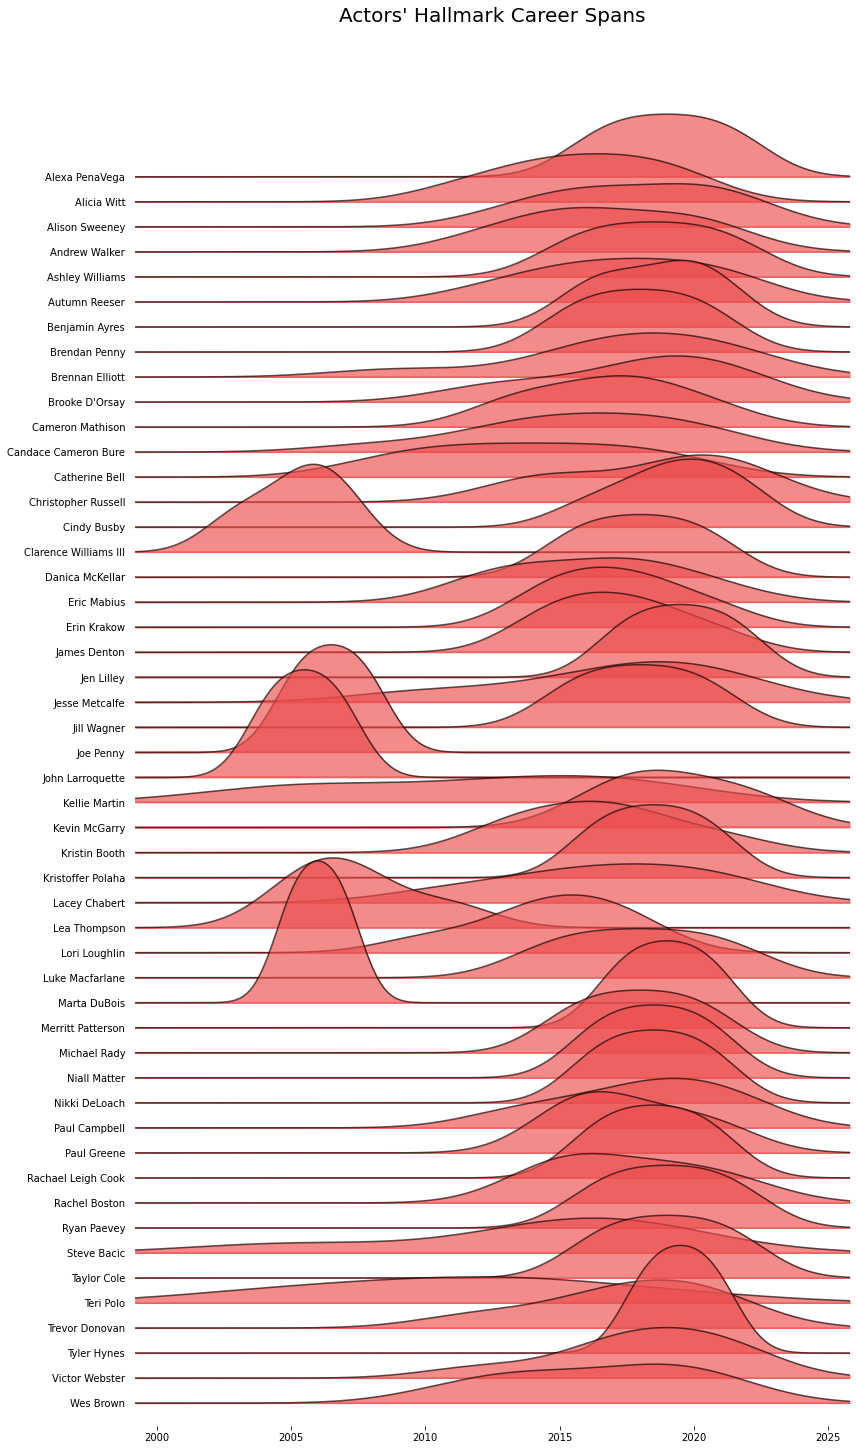

In [177]:
plt.figure()

joyplot(
    data=source[['year', 'Starring']], 
    by='Starring',
    alpha=0.65,
    color='#eb4d4b',
    overlap=3,
    figsize=(12, 20)
)
plt.title("Actors' Hallmark Career Spans", fontsize=20)
plt.show()

Which time of the year do the most number of movies get made? (we know its december but over the years there have been more seasonal offerings - it would be interesting to see how Hallmark monetized seasonal sentiments)

In [187]:

s = "March, 2017"
d = datetime.strptime(s, '%B, %Y')
print(d.strftime('%Y-%m'))

2017-03


November     185
December     139
October       99
January       91
August        73
June          69
February      65
April         56
March         54
May           50
September     45
July          42
Name: month, dtype: int64